# Import Required Libraries

In [230]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [231]:
#Lloguers#####################################################################################################
#Merge the data

# Load Data
file1_path = './portal_dades_bcn_ajuntament/bcn_lloguer_preuperm2_2014_2024.csv'
file2_path = './portal_dades_bcn_ajuntament/bcn_lloguer_preutotal_2014_2024.csv'
price_per_m2_df = pd.read_csv(file1_path)
total_rent_price_df = pd.read_csv(file2_path)
# Reshape Data from Wide to Long Format
price_per_m2_df = price_per_m2_df.melt(id_vars=['Territori', 'Tipus de territori'], var_name='year', value_name='price_per_m2')
total_rent_price_df = total_rent_price_df.melt(id_vars=['Territori', 'Tipus de territori'], var_name='year', value_name='total_rent_price')
# Convert 'year' column to integer
price_per_m2_df['year'] = price_per_m2_df['year'].astype(int)
total_rent_price_df['year'] = total_rent_price_df['year'].astype(int)
# Filter Data to Remove Rows from 2013 (included) until 2000
#price_per_m2_df = price_per_m2_df[price_per_m2_df['year'] > 2013]
#total_rent_price_df = total_rent_price_df[total_rent_price_df['year'] > 2013]
# Merge DataFrames
lloguer_df = pd.merge(price_per_m2_df, total_rent_price_df, on=['Territori', 'Tipus de territori', 'year'], suffixes=('_per_m2', '_total'))
# Display the first few rows of the merged DataFrame to inspect the result
print(lloguer_df.head())
# Save Merged Data
lloguer_df.to_csv('./portal_dades_bcn_ajuntament/merged_rent_prices_2014_2024.csv', index=False)

'''
lloguer_df = './portal_dades_bcn_ajuntament/merged_rent_prices_2014_2024.csv'
lloguer_df = pd.read_csv(lloguer_df)
print(lloguer_df.head())
'''

        Territori Tipus de territori  year  price_per_m2  total_rent_price
0       Barcelona           Municipi  2000          6.00            408.27
1    Ciutat Vella          Districte  2000          5.53            325.19
2        el Raval              Barri  2000           NaN               NaN
3  el Barri Gotic              Barri  2000           NaN               NaN
4  la Barceloneta              Barri  2000           NaN               NaN


"\nlloguer_df = './portal_dades_bcn_ajuntament/merged_rent_prices_2014_2024.csv'\nlloguer_df = pd.read_csv(lloguer_df)\nprint(lloguer_df.head())\n"

In [232]:
#Compraventa#####################################################################################################
#Merge the data
# Load Data
file1_path = './portal_dades_bcn_ajuntament/bcn_preutotal_2014_2024.csv'
file2_path = './portal_dades_bcn_ajuntament/bcn_preuperm2_2014_2024.csv'
price_per_m2_df = pd.read_csv(file1_path)
total_sale_price_df = pd.read_csv(file2_path)
# Reshape Data from Wide to Long Format
price_per_m2_df = price_per_m2_df.melt(id_vars=['Territori', 'Tipus de territori'], var_name='year', value_name='total_sale_price')
total_sale_price_df = total_sale_price_df.melt(id_vars=['Territori', 'Tipus de territori'], var_name='year', value_name='price_per_m2')
# Convert 'year' column to integer
price_per_m2_df['year'] = price_per_m2_df['year'].astype(int)
total_sale_price_df['year'] = total_sale_price_df['year'].astype(int)
# Filter Data to Remove Rows from 2013 (included) until 2000
#price_per_m2_df = price_per_m2_df[price_per_m2_df['year'] > 2013]
#total_sale_price_df = total_sale_price_df[total_sale_price_df['year'] > 2013]
# Merge DataFrames
compraventa = pd.merge(price_per_m2_df, total_sale_price_df, on=['Territori', 'Tipus de territori', 'year'], suffixes=('_total', '_per_m2'))
# Display the first few rows of the merged DataFrame to inspect the result
print(compraventa.head())
# Save Merged Data
compraventa.to_csv('./portal_dades_bcn_ajuntament/merged_sale_prices_2014_2024.csv', index=False)
'''
compraventa = './portal_dades_bcn_ajuntament/merged_sale_prices_2014_2024.csv'
compraventa = pd.read_csv(compraventa)
print(compraventa.head())
'''

        Territori Tipus de territori  year  total_sale_price  price_per_m2
0       Barcelona           Municipi  2012         214711.06       2460.69
1    Ciutat Vella          Districte  2012         152857.03       2355.40
2        el Raval              Barri  2012         113980.55       1816.11
3  el Barri Gotic              Barri  2012         190196.31       2409.44
4  la Barceloneta              Barri  2012         124316.76       2873.50


"\ncompraventa = './portal_dades_bcn_ajuntament/merged_sale_prices_2014_2024.csv'\ncompraventa = pd.read_csv(compraventa)\nprint(compraventa.head())\n"

# Inspect Data

In [233]:
# Filter data where Tipus de territori is 'Districte'
lloguer_district_df = lloguer_df[lloguer_df['Tipus de territori'] == 'Districte']
compraventa_district_df = compraventa[compraventa['Tipus de territori'] == 'Districte']
# Function to plot evolution of prices
def plot_evolution(df, price_column, title):
    districts = df['Territori'].unique()
    plt.figure(figsize=(10, 5))
    for district in districts:
        district_df = df[df['Territori'] == district]
        plt.plot(district_df['year'], district_df[price_column], label=district)
    plt.xlabel('Year')
    plt.ylabel(price_column)
    plt.title(title)
    plt.legend()
    plt.show()

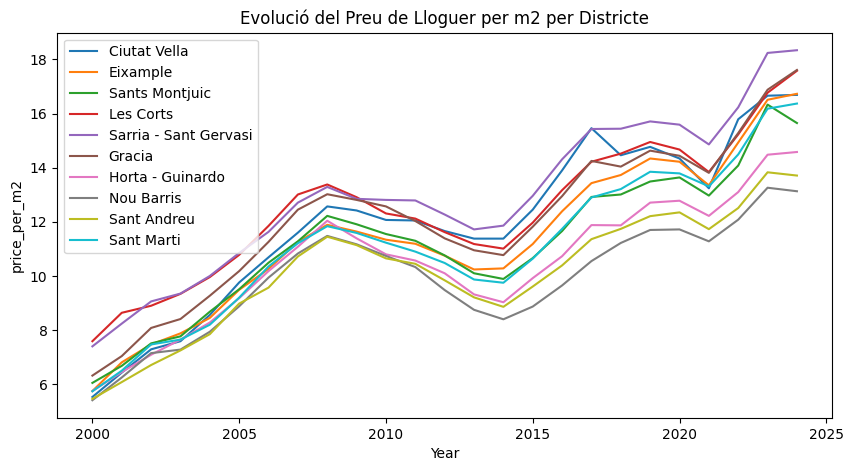

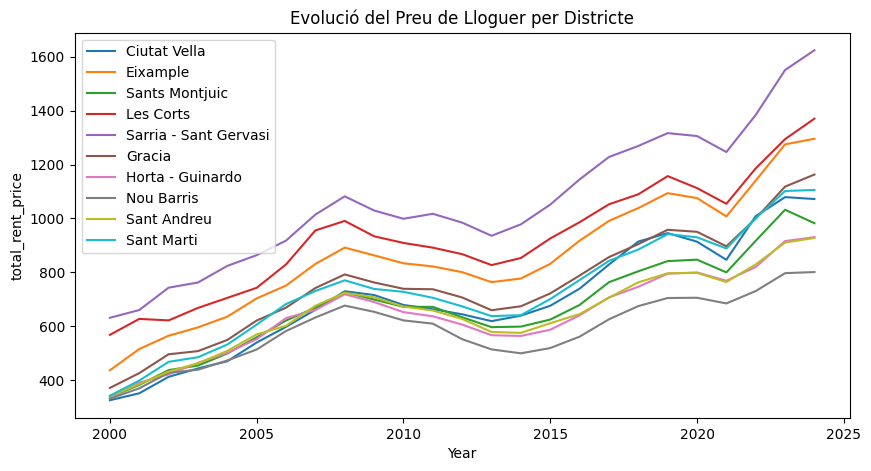

In [234]:
#Plots preus de lloguer////////////////////////////////////////////////////////////////////////////////////////////////////////
plot_evolution(lloguer_district_df, 'price_per_m2', 'Evolució del Preu de Lloguer per m2 per Districte')
plot_evolution(lloguer_district_df, 'total_rent_price', 'Evolució del Preu de Lloguer per Districte')

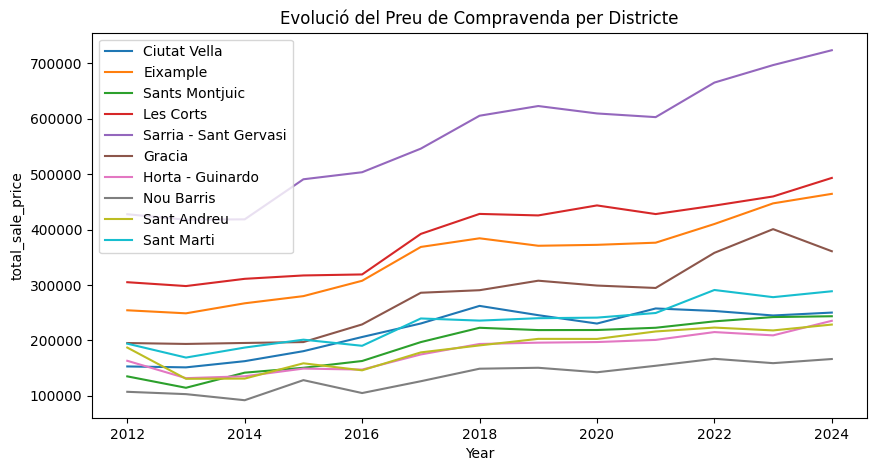

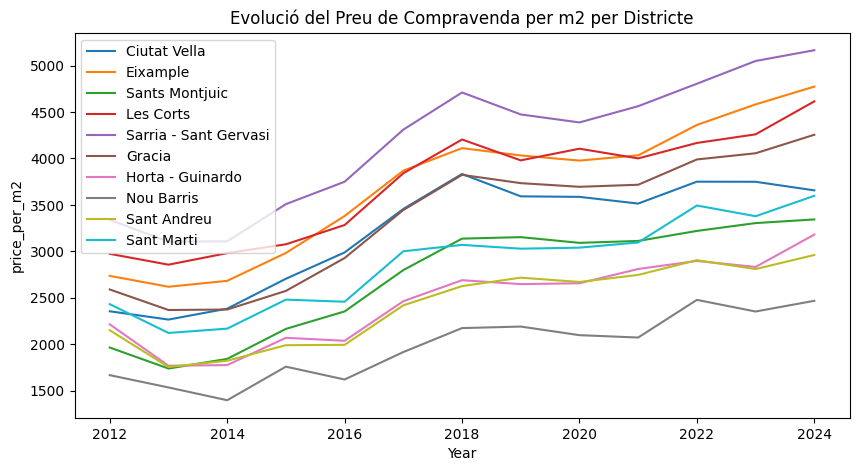

In [235]:
plot_evolution(compraventa_district_df, 'total_sale_price', 'Evolució del Preu de Compravenda per Districte')
plot_evolution(compraventa_district_df, 'price_per_m2', 'Evolució del Preu de Compravenda per m2 per Districte')

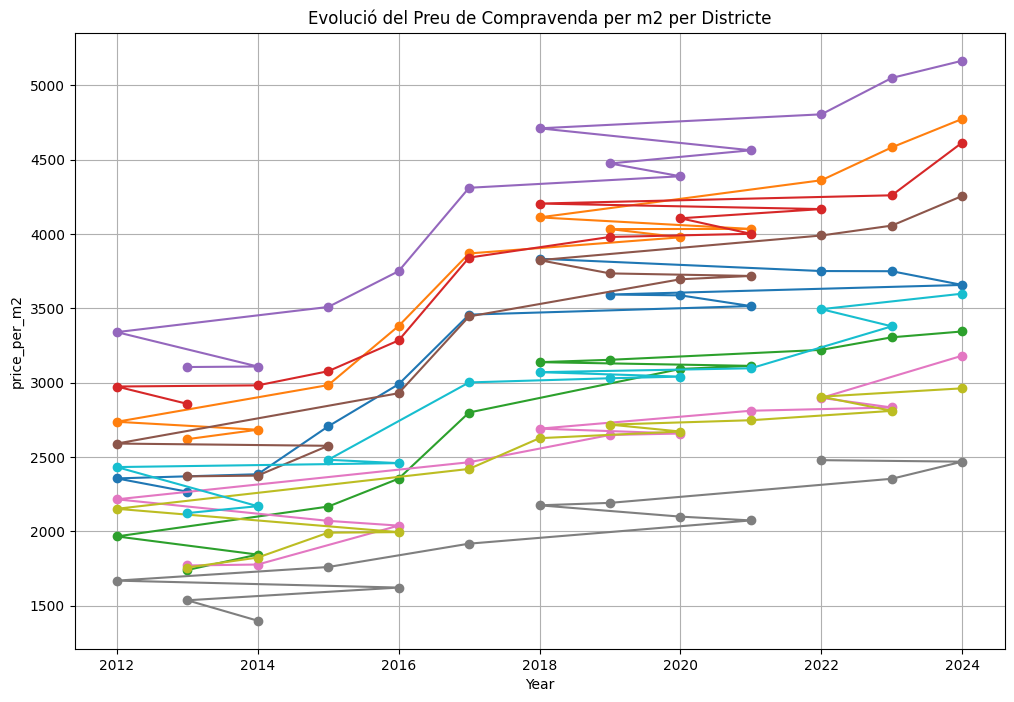

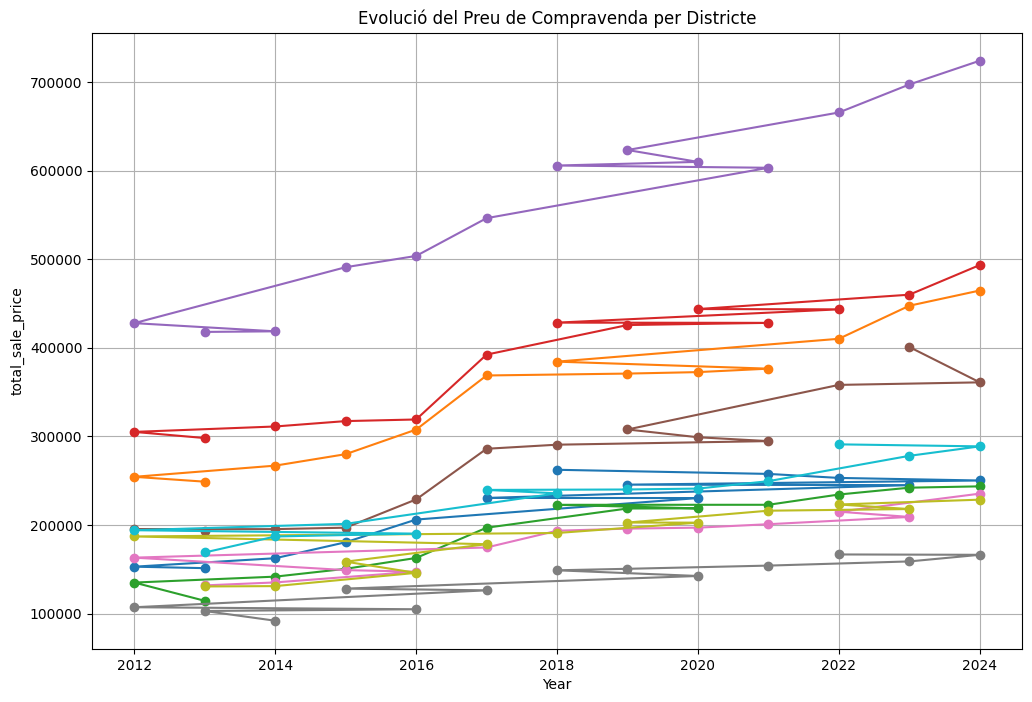

In [236]:

# Function to plot evolution of prices with fixed y-axis limits
def plot_evolution_line(df, price_column, title):
    districts = df['Territori'].unique()
    plt.figure(figsize=(12, 8))
    for district in districts:
        #district_df should be sorted for all districts
        district_df = df[df['Territori'] == district].sort_values(by=price_column)
        plt.plot(district_df['year'], district_df[price_column], label=district, marker='o')
    plt.xlabel('Year')
    plt.ylabel(price_column)
    plt.title(title)
    #plt.legend()
    plt.grid(True)
    plt.show()

# Plot the data with fixed y-axis limits
plot_evolution_line(compraventa_district_df, 'price_per_m2', 'Evolució del Preu de Compravenda per m2 per Districte')
plot_evolution_line(compraventa_district_df, 'total_sale_price', 'Evolució del Preu de Compravenda per Districte')

Model Creation

In [237]:
#%pip install prophet
#pip install cmdstanpy
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [238]:
import cmdstanpy
print(cmdstanpy.__version__)

1.2.4


17:08:11 - cmdstanpy - INFO - Chain [1] start processing
17:08:11 - cmdstanpy - INFO - Chain [1] done processing


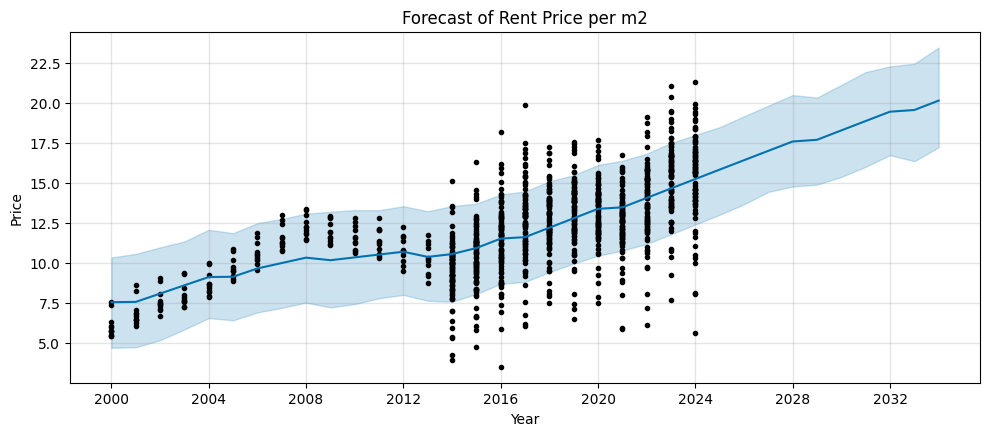

17:08:12 - cmdstanpy - INFO - Chain [1] start processing
17:08:12 - cmdstanpy - INFO - Chain [1] done processing


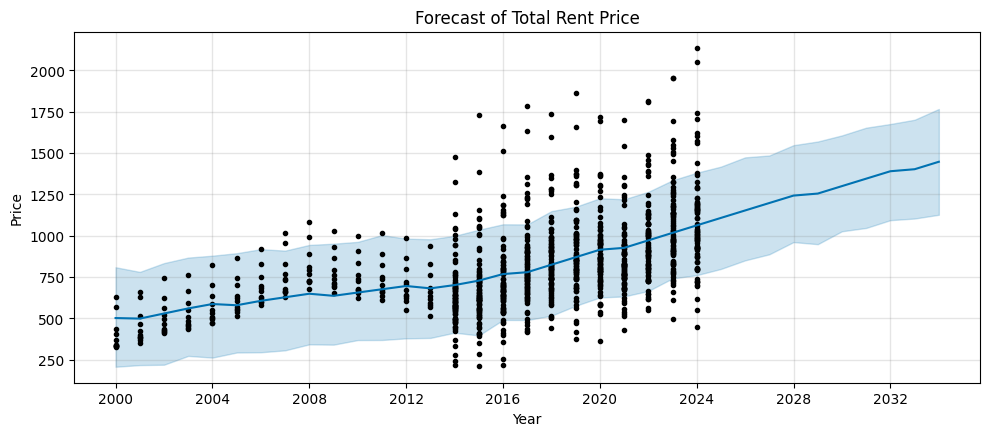

17:08:12 - cmdstanpy - INFO - Chain [1] start processing
17:08:12 - cmdstanpy - INFO - Chain [1] done processing


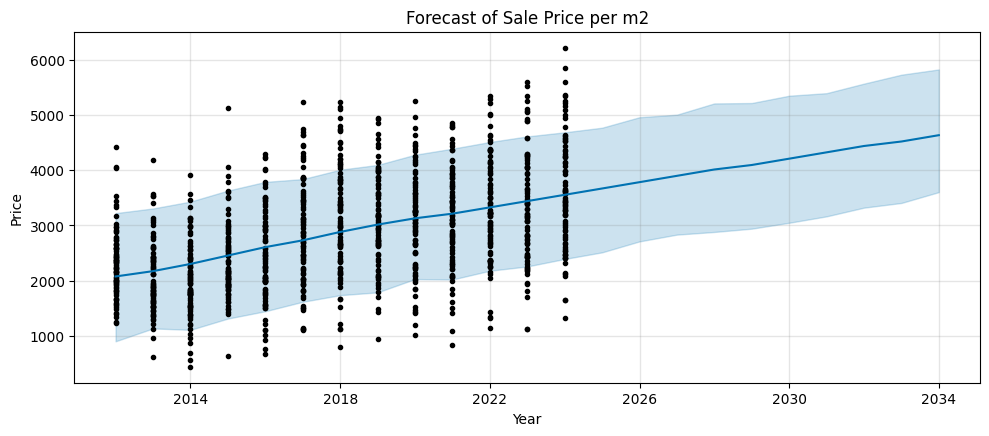

17:08:12 - cmdstanpy - INFO - Chain [1] start processing
17:08:12 - cmdstanpy - INFO - Chain [1] done processing


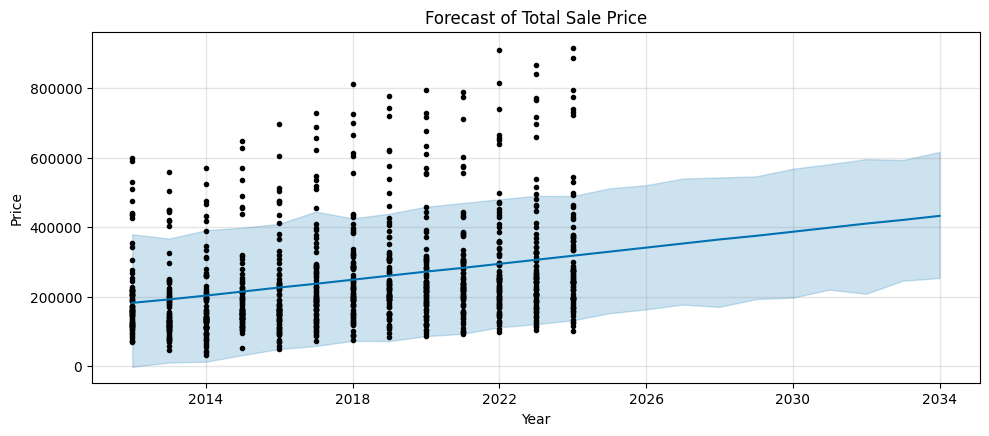

In [239]:
import pandas as pd
from prophet import Prophet
import cmdstanpy

import matplotlib.pyplot as plt

# Prepare the data for Prophet
def prepare_data(df, column):
    df = df[['year', column]].rename(columns={'year': 'ds', column: 'y'})
    df['ds'] = pd.to_datetime(df['ds'], format='%Y')
    return df

# Train and predict using Prophet
def train_and_predict(df, periods, freq='YE'):
    model = Prophet()
    model.fit(df)
    future = model.make_future_dataframe(periods=periods, freq=freq)
    forecast = model.predict(future)
    return model, forecast

# Plot the forecast
def plot_forecast(model, forecast, title):
    fig = model.plot(forecast)
    fig.set_size_inches(10, 4)
    plt.title(title)
    plt.ticklabel_format(style='plain', axis='y')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()

# Plot the forecast with dual y-axes
def plot_forecast_dual_y(model_rent, forecast_rent, rent_data, model_sale, forecast_sale, sale_data, title):
    fig, ax1 = plt.subplots(figsize=(10, 3))
    color = 'tab:blue'
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Total Rent Price (€)', color=color)
    ax1.plot(forecast_rent['ds'], forecast_rent['yhat'], label='Forecasted Total Rent Price', color=color)
    ax1.scatter(rent_data['ds'], rent_data['y'], color=color, marker='o', label='Historical Total Rent Price')
    ax1.tick_params(axis='y', labelcolor=color)

    
    ax2 = ax1.twinx()
    color = 'tab:orange'
    ax2.set_ylabel('Total Sale Price (€)', color=color)
    ax2.plot(forecast_sale['ds'], forecast_sale['yhat'], label='Forecasted Total Sale Price', color=color)
    ax2.scatter(sale_data['ds'], sale_data['y'], color=color, marker='o', label='Historical Total Sale Price')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title(title)
    plt.show()

# Load Data with specified encoding
lloguer_df = pd.read_csv('./portal_dades_bcn_ajuntament/merged_rent_prices_2014_2024.csv', encoding='ISO-8859-1')
compraventa_df = pd.read_csv('./portal_dades_bcn_ajuntament/merged_sale_prices_2014_2024.csv', encoding='ISO-8859-1')

# Prepare data for rent price per m2
lloguer_price_per_m2_df = prepare_data(lloguer_df, 'price_per_m2')
# Prepare data for total rent price
lloguer_total_rent_price_df = prepare_data(lloguer_df, 'total_rent_price')

# Prepare data for sale price per m2
compraventa_price_per_m2_df = prepare_data(compraventa_df, 'price_per_m2')
# Prepare data for total sale price
compraventa_total_sale_price_df = prepare_data(compraventa_df, 'total_sale_price')

# Train and predict for rent price per m2
model_rent_price_per_m2, forecast_rent_price_per_m2 = train_and_predict(lloguer_price_per_m2_df, periods=10)
plot_forecast(model_rent_price_per_m2, forecast_rent_price_per_m2, 'Forecast of Rent Price per m2')

# Train and predict for total rent price
model_total_rent_price, forecast_total_rent_price = train_and_predict(lloguer_total_rent_price_df, periods=10)
plot_forecast(model_total_rent_price, forecast_total_rent_price, 'Forecast of Total Rent Price')

# Train and predict for sale price per m2
model_sale_price_per_m2, forecast_sale_price_per_m2 = train_and_predict(compraventa_price_per_m2_df, periods=10)
plot_forecast(model_sale_price_per_m2, forecast_sale_price_per_m2, 'Forecast of Sale Price per m2')

# Train and predict for total sale price
model_total_sale_price, forecast_total_sale_price = train_and_predict(compraventa_total_sale_price_df, periods=10)
plot_forecast(model_total_sale_price, forecast_total_sale_price, 'Forecast of Total Sale Price')

In [240]:
# Python
from prophet.diagnostics import cross_validation, performance_metrics
# Cross-validate with initial 3 years, horizon 1 year
df_cv = cross_validation(model_rent_price_per_m2, initial='1095 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)
print(df_p.head())

  0%|          | 0/41 [00:00<?, ?it/s]

17:08:12 - cmdstanpy - INFO - Chain [1] start processing
17:08:12 - cmdstanpy - INFO - Chain [1] done processing
17:08:13 - cmdstanpy - INFO - Chain [1] start processing
17:08:13 - cmdstanpy - INFO - Chain [1] done processing
17:08:13 - cmdstanpy - INFO - Chain [1] start processing
17:08:13 - cmdstanpy - INFO - Chain [1] done processing
17:08:13 - cmdstanpy - INFO - Chain [1] start processing
17:08:13 - cmdstanpy - INFO - Chain [1] done processing
17:08:13 - cmdstanpy - INFO - Chain [1] start processing
17:08:13 - cmdstanpy - INFO - Chain [1] done processing
17:08:13 - cmdstanpy - INFO - Chain [1] start processing
17:08:13 - cmdstanpy - INFO - Chain [1] done processing
17:08:13 - cmdstanpy - INFO - Chain [1] start processing
17:08:14 - cmdstanpy - INFO - Chain [1] done processing
17:08:14 - cmdstanpy - INFO - Chain [1] start processing
17:08:14 - cmdstanpy - INFO - Chain [1] done processing
17:08:14 - cmdstanpy - INFO - Chain [1] start processing
17:08:14 - cmdstanpy - INFO - Chain [1]

   horizon       mse      rmse       mae      mape     mdape     smape  \
0 138 days  4.150952  2.037388  1.526548  0.168273  0.112880  0.156588   
1 143 days  6.162787  2.482496  1.958711  0.189944  0.157944  0.189697   
2 149 days  9.559229  3.091800  2.520166  0.210933  0.191219  0.225175   
3 154 days  8.469989  2.910325  2.316933  0.189190  0.153116  0.196458   
4 159 days  5.779045  2.403964  1.850363  0.156965  0.105055  0.149904   

   coverage  
0  0.480519  
1  0.474490  
2  0.430940  
3  0.574708  
4  0.742255  


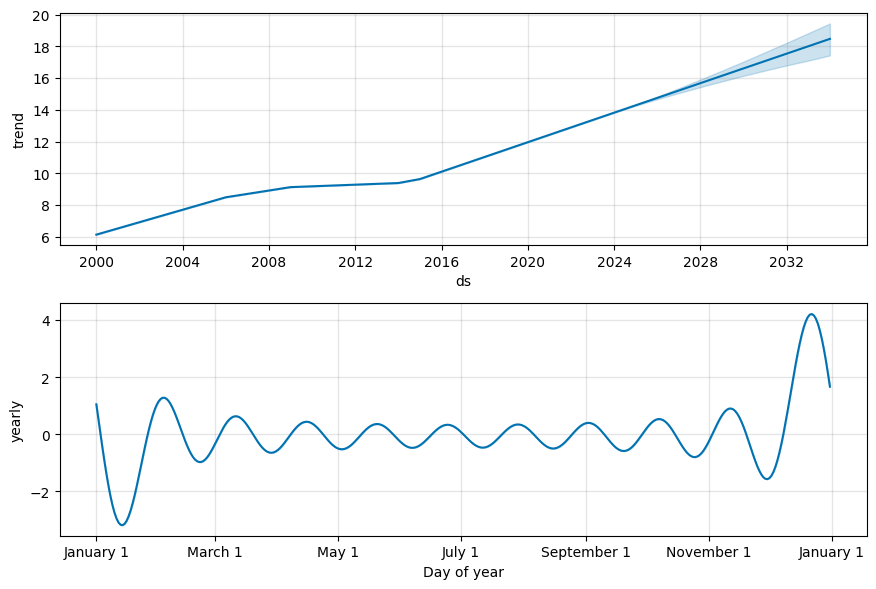

In [241]:
# Python
model_rent_price_per_m2.plot_components(forecast_rent_price_per_m2)
plt.show()

17:08:19 - cmdstanpy - INFO - Chain [1] start processing
17:08:19 - cmdstanpy - INFO - Chain [1] done processing
17:08:19 - cmdstanpy - INFO - Chain [1] start processing
17:08:19 - cmdstanpy - INFO - Chain [1] done processing


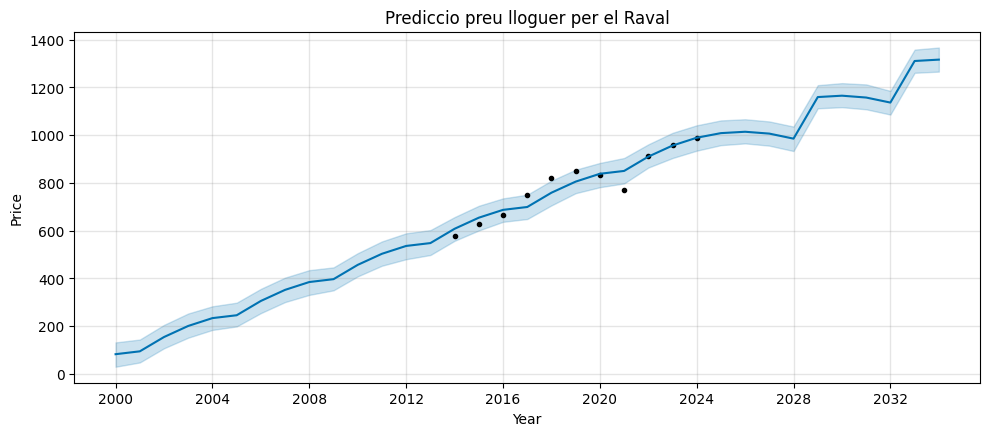

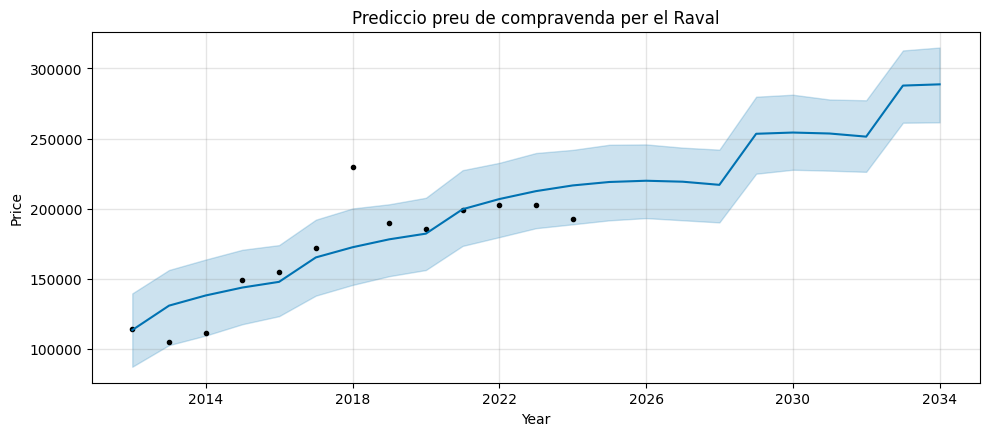

17:08:19 - cmdstanpy - INFO - Chain [1] start processing
17:08:19 - cmdstanpy - INFO - Chain [1] done processing
17:08:19 - cmdstanpy - INFO - Chain [1] start processing
17:08:20 - cmdstanpy - INFO - Chain [1] done processing


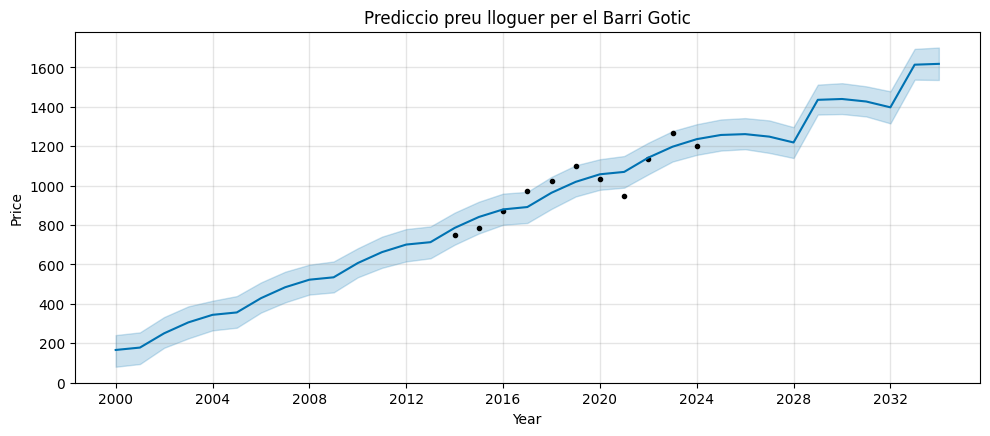

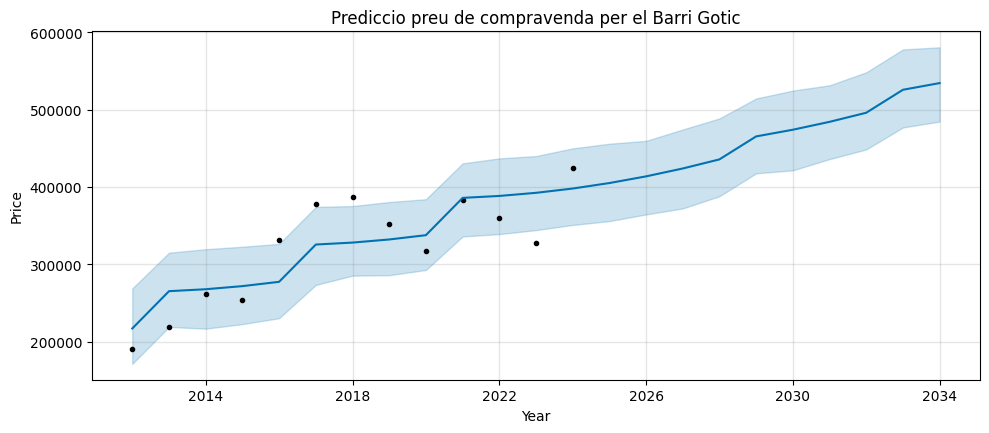

17:08:20 - cmdstanpy - INFO - Chain [1] start processing
17:08:20 - cmdstanpy - INFO - Chain [1] done processing
17:08:20 - cmdstanpy - INFO - Chain [1] start processing
17:08:20 - cmdstanpy - INFO - Chain [1] done processing


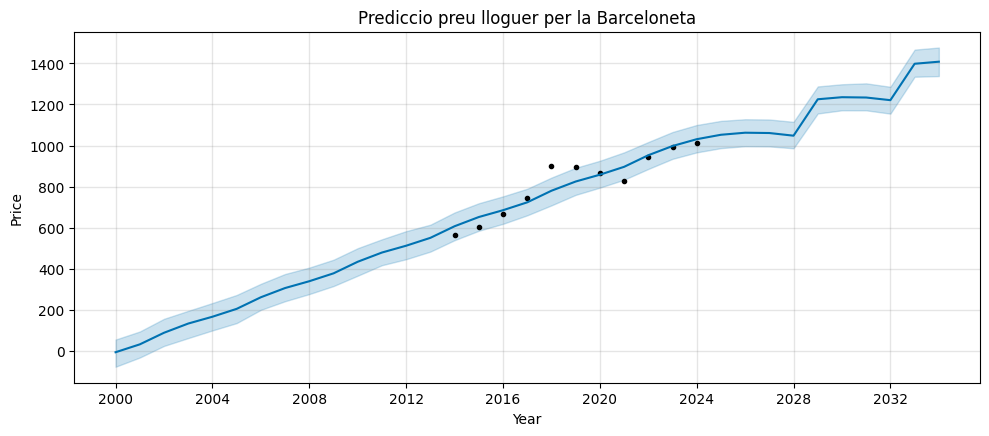

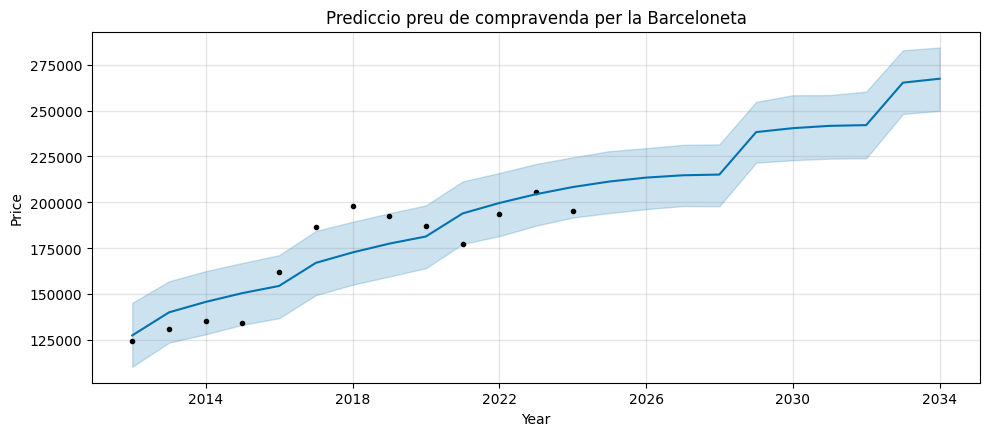

17:08:20 - cmdstanpy - INFO - Chain [1] start processing
17:08:20 - cmdstanpy - INFO - Chain [1] done processing
17:08:20 - cmdstanpy - INFO - Chain [1] start processing
17:08:20 - cmdstanpy - INFO - Chain [1] done processing


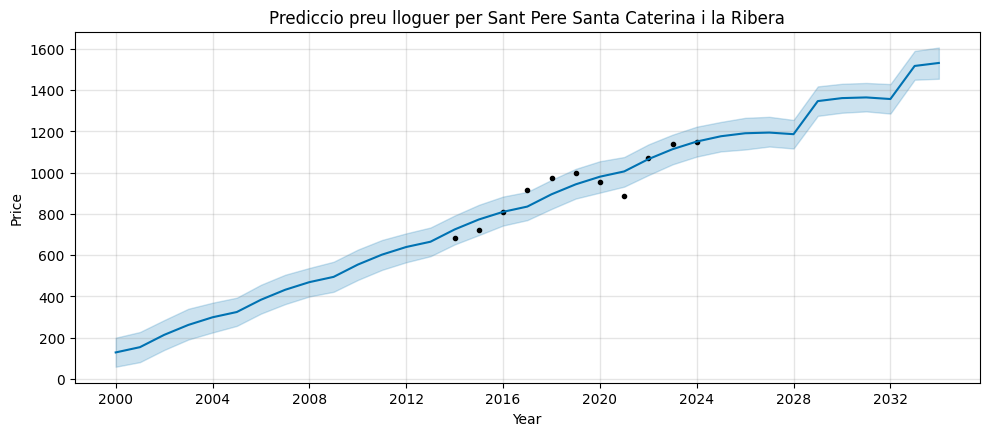

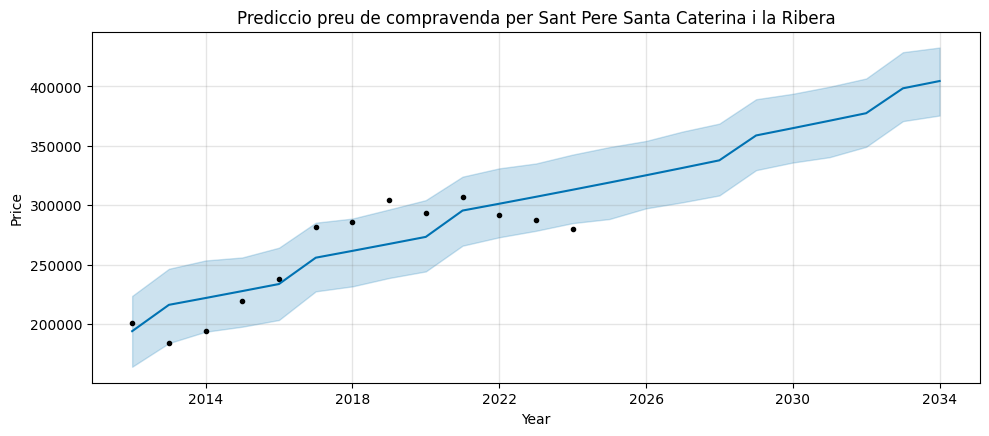

17:08:21 - cmdstanpy - INFO - Chain [1] start processing
17:08:21 - cmdstanpy - INFO - Chain [1] done processing
17:08:21 - cmdstanpy - INFO - Chain [1] start processing
17:08:21 - cmdstanpy - INFO - Chain [1] done processing


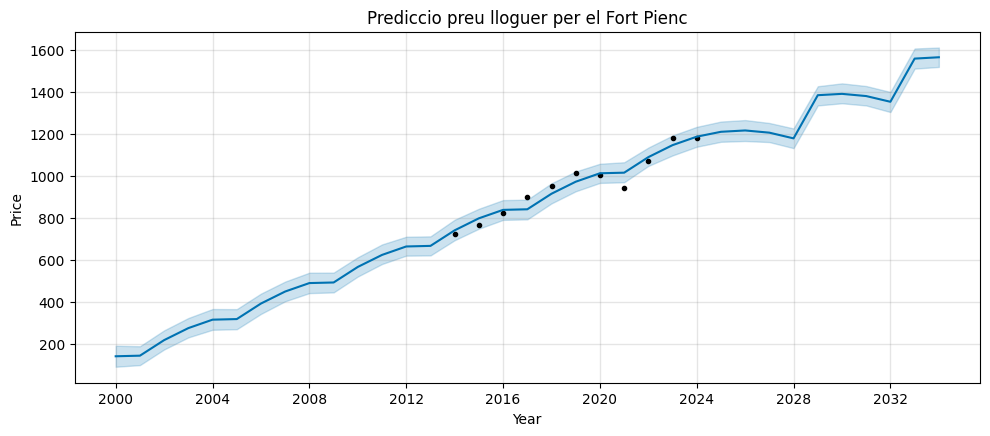

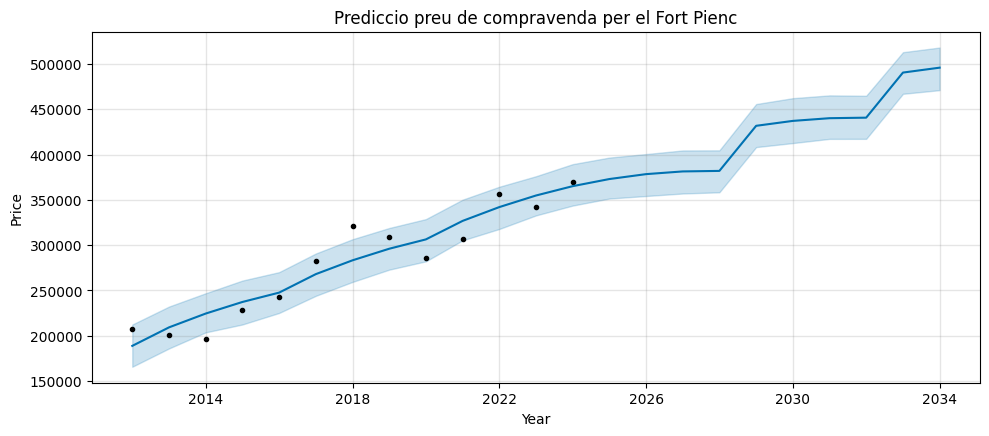

17:08:21 - cmdstanpy - INFO - Chain [1] start processing
17:08:21 - cmdstanpy - INFO - Chain [1] done processing
17:08:21 - cmdstanpy - INFO - Chain [1] start processing
17:08:21 - cmdstanpy - INFO - Chain [1] done processing


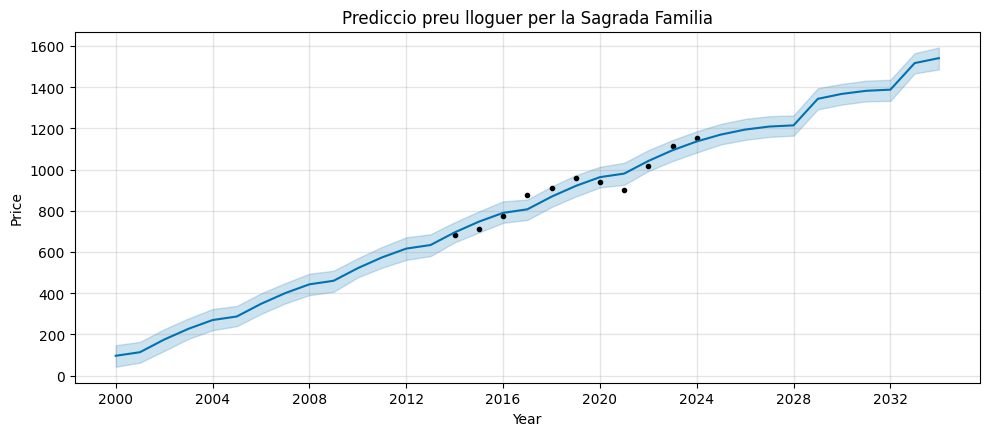

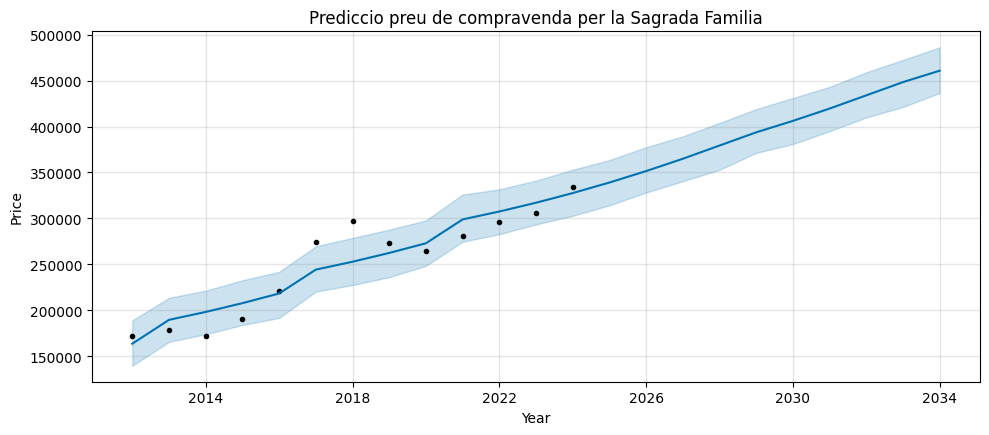

17:08:22 - cmdstanpy - INFO - Chain [1] start processing
17:08:22 - cmdstanpy - INFO - Chain [1] done processing
17:08:22 - cmdstanpy - INFO - Chain [1] start processing
17:08:22 - cmdstanpy - INFO - Chain [1] done processing


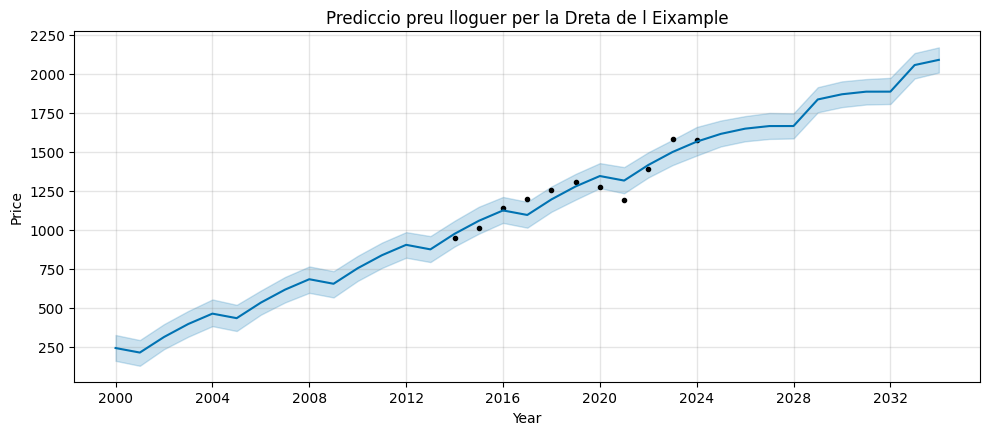

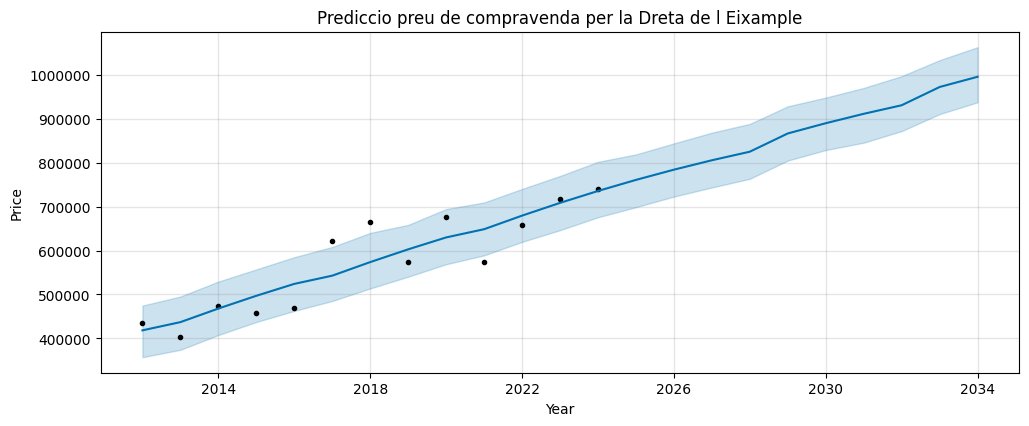

17:08:22 - cmdstanpy - INFO - Chain [1] start processing
17:08:22 - cmdstanpy - INFO - Chain [1] done processing
17:08:22 - cmdstanpy - INFO - Chain [1] start processing
17:08:22 - cmdstanpy - INFO - Chain [1] done processing


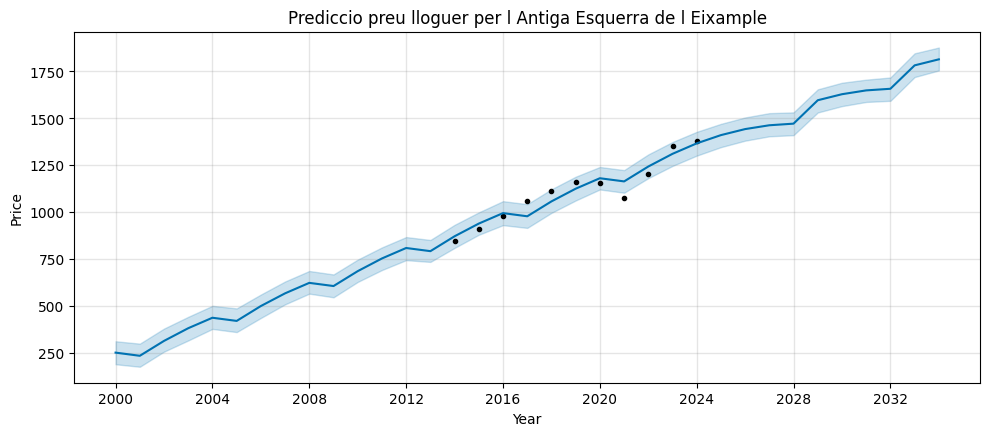

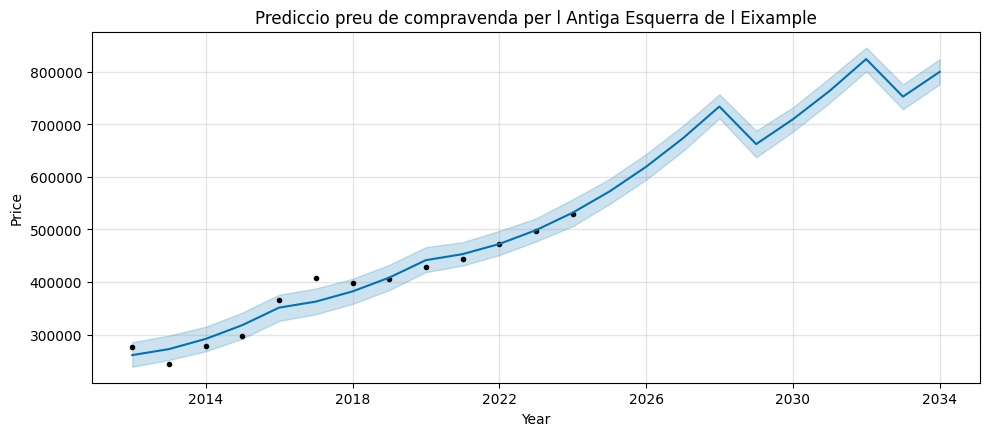

17:08:23 - cmdstanpy - INFO - Chain [1] start processing
17:08:23 - cmdstanpy - INFO - Chain [1] done processing
17:08:23 - cmdstanpy - INFO - Chain [1] start processing
17:08:23 - cmdstanpy - INFO - Chain [1] done processing


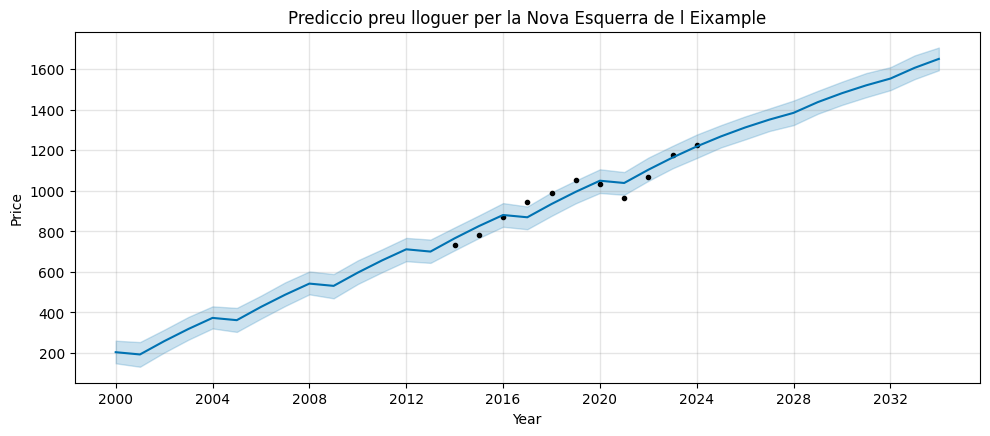

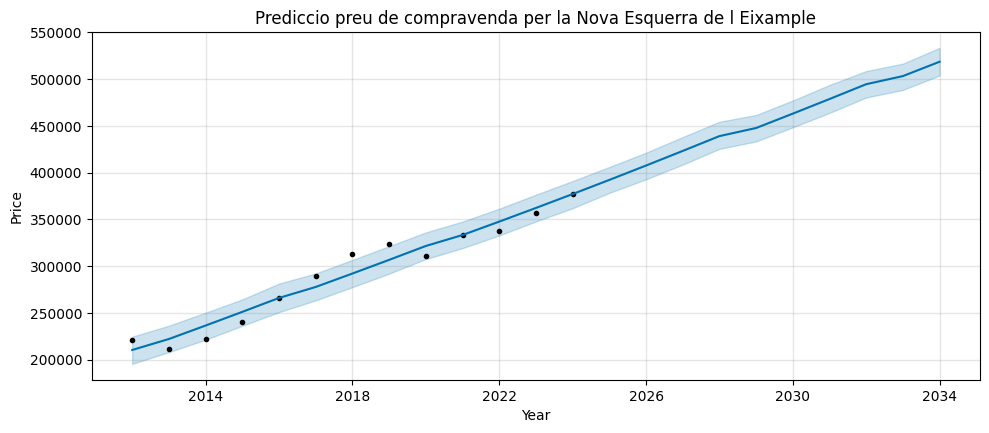

17:08:23 - cmdstanpy - INFO - Chain [1] start processing
17:08:23 - cmdstanpy - INFO - Chain [1] done processing
17:08:23 - cmdstanpy - INFO - Chain [1] start processing
17:08:23 - cmdstanpy - INFO - Chain [1] done processing


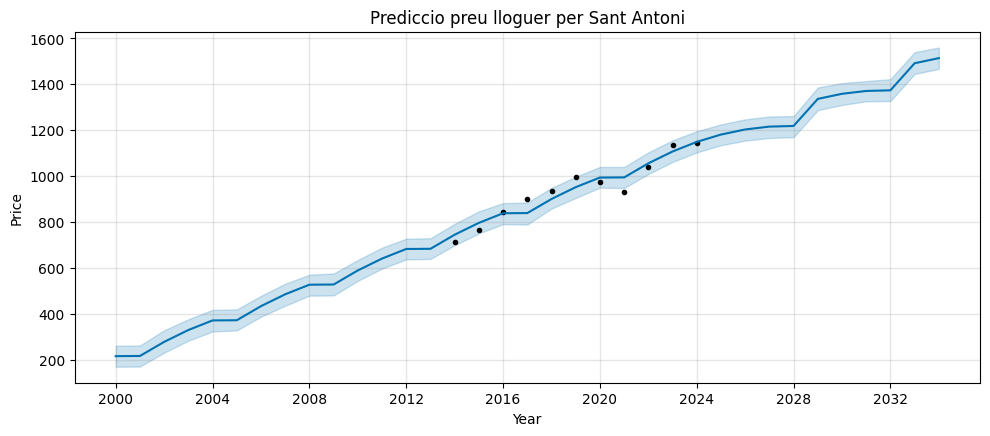

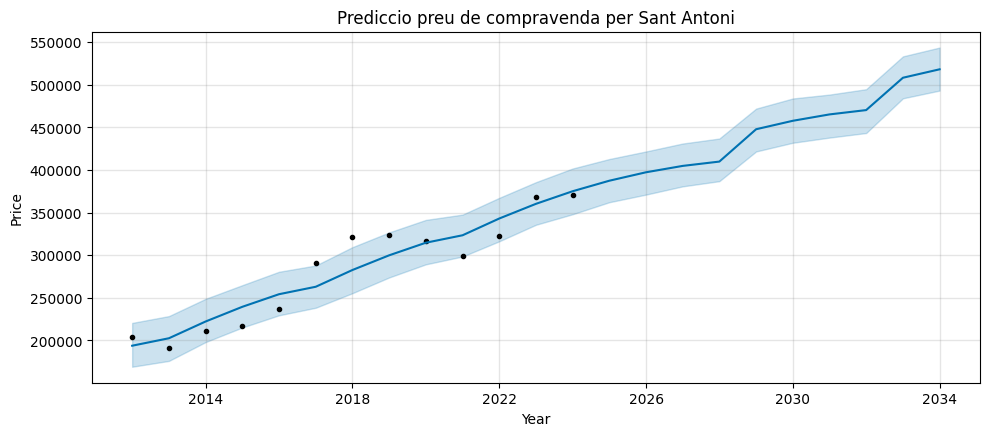

17:08:24 - cmdstanpy - INFO - Chain [1] start processing
17:08:24 - cmdstanpy - INFO - Chain [1] done processing


ValueError: Dataframe has less than 2 non-NaN rows.

In [ ]:
#Plotting for all districts
# Get unique districts
districts = lloguer_df[lloguer_df['Tipus de territori'] == 'Districte']['Territori'].unique()



# Loop through each district and plot forecasts
for district in districts:
    # Filter data for the current district
    district_rent_df = lloguer_df[(lloguer_df['Tipus de territori'] == 'Districte') & (lloguer_df['Territori'] == district)]
    district_sale_df = compraventa_df[(compraventa_df['Tipus de territori'] == 'Districte') & (compraventa_df['Territori'] == district)]
    
    # Prepare data for Prophet
    district_rent_data = prepare_data(district_rent_df, 'total_rent_price')
    district_sale_data = prepare_data(district_sale_df, 'total_sale_price')
    
    # Train and predict using Prophet
    model_rent, forecast_rent = train_and_predict(district_rent_data, periods=10)
    model_sale, forecast_sale = train_and_predict(district_sale_data, periods=10)
    
    # Plot the forecasts
    plot_forecast(model_rent, forecast_rent, f'Prediccio preu lloguer per {district}')
    plot_forecast(model_sale, forecast_sale, f'Prediccio preu de compravenda per {district}')

17:02:18 - cmdstanpy - INFO - Chain [1] start processing
17:02:18 - cmdstanpy - INFO - Chain [1] done processing
17:02:18 - cmdstanpy - INFO - Chain [1] start processing
17:02:18 - cmdstanpy - INFO - Chain [1] done processing


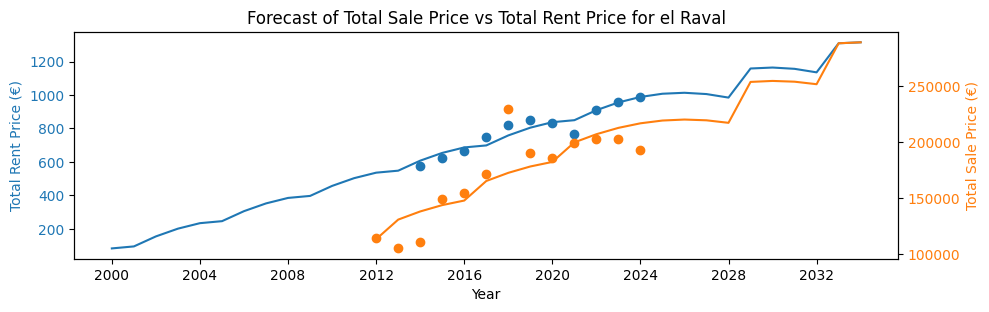

17:02:18 - cmdstanpy - INFO - Chain [1] start processing
17:02:18 - cmdstanpy - INFO - Chain [1] done processing
17:02:18 - cmdstanpy - INFO - Chain [1] start processing
17:02:18 - cmdstanpy - INFO - Chain [1] done processing


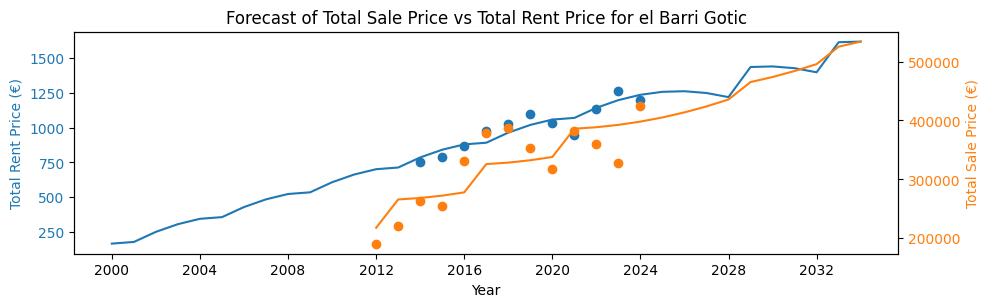

17:02:19 - cmdstanpy - INFO - Chain [1] start processing
17:02:19 - cmdstanpy - INFO - Chain [1] done processing
17:02:19 - cmdstanpy - INFO - Chain [1] start processing
17:02:19 - cmdstanpy - INFO - Chain [1] done processing


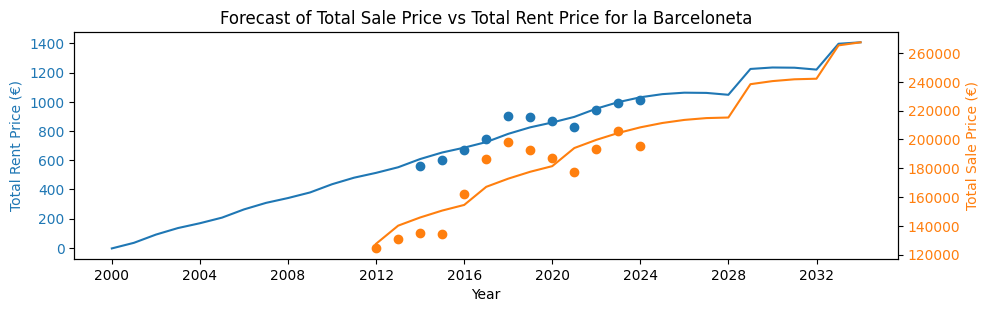

17:02:19 - cmdstanpy - INFO - Chain [1] start processing
17:02:19 - cmdstanpy - INFO - Chain [1] done processing
17:02:19 - cmdstanpy - INFO - Chain [1] start processing
17:02:19 - cmdstanpy - INFO - Chain [1] done processing


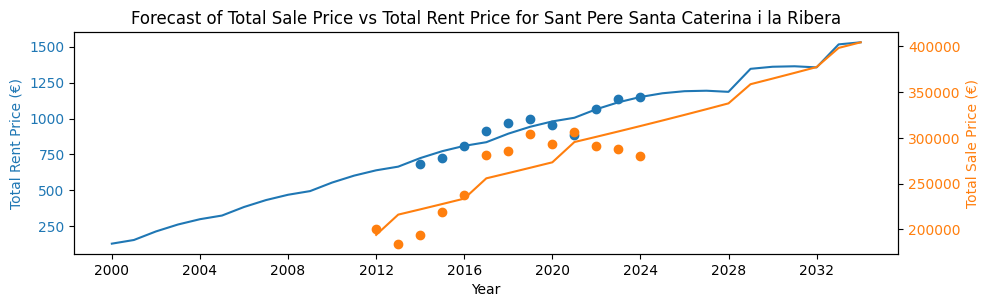

17:02:20 - cmdstanpy - INFO - Chain [1] start processing
17:02:20 - cmdstanpy - INFO - Chain [1] done processing
17:02:20 - cmdstanpy - INFO - Chain [1] start processing
17:02:20 - cmdstanpy - INFO - Chain [1] done processing


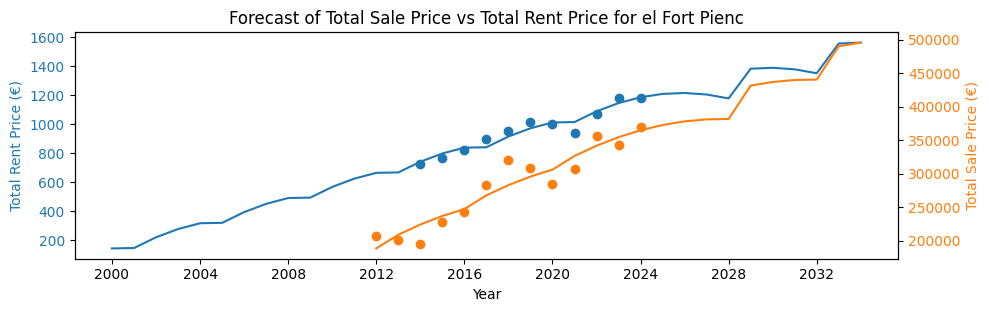

17:02:20 - cmdstanpy - INFO - Chain [1] start processing
17:02:20 - cmdstanpy - INFO - Chain [1] done processing
17:02:20 - cmdstanpy - INFO - Chain [1] start processing
17:02:20 - cmdstanpy - INFO - Chain [1] done processing


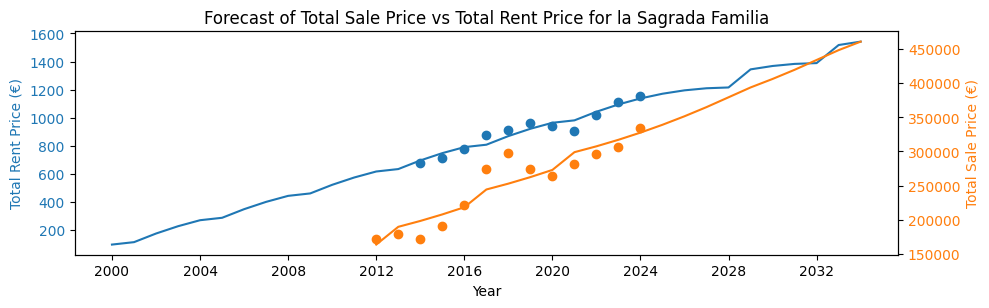

17:02:20 - cmdstanpy - INFO - Chain [1] start processing
17:02:21 - cmdstanpy - INFO - Chain [1] done processing
17:02:21 - cmdstanpy - INFO - Chain [1] start processing
17:02:21 - cmdstanpy - INFO - Chain [1] done processing


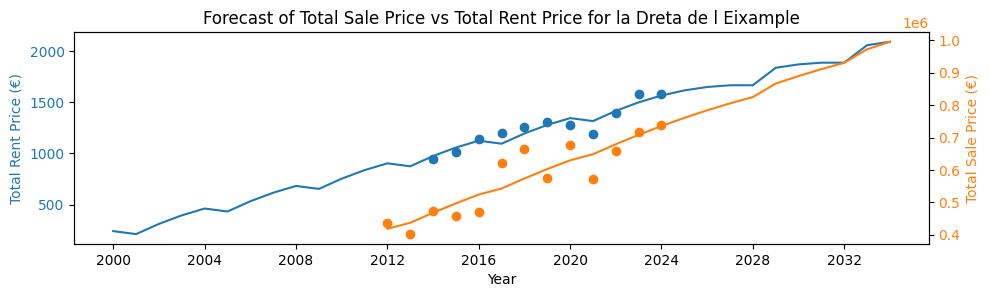

17:02:21 - cmdstanpy - INFO - Chain [1] start processing
17:02:21 - cmdstanpy - INFO - Chain [1] done processing
17:02:21 - cmdstanpy - INFO - Chain [1] start processing
17:02:21 - cmdstanpy - INFO - Chain [1] done processing


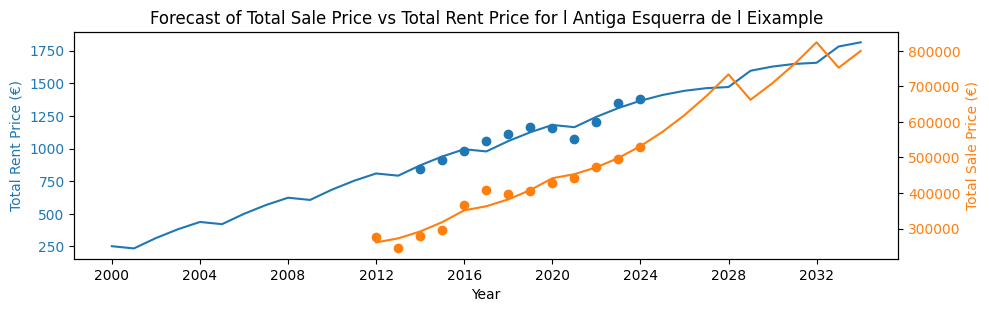

17:02:21 - cmdstanpy - INFO - Chain [1] start processing
17:02:21 - cmdstanpy - INFO - Chain [1] done processing
17:02:21 - cmdstanpy - INFO - Chain [1] start processing
17:02:21 - cmdstanpy - INFO - Chain [1] done processing


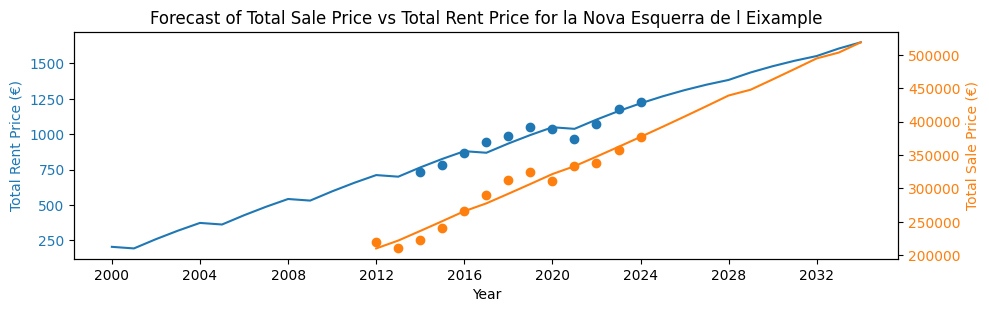

17:02:22 - cmdstanpy - INFO - Chain [1] start processing
17:02:22 - cmdstanpy - INFO - Chain [1] done processing
17:02:22 - cmdstanpy - INFO - Chain [1] start processing
17:02:22 - cmdstanpy - INFO - Chain [1] done processing


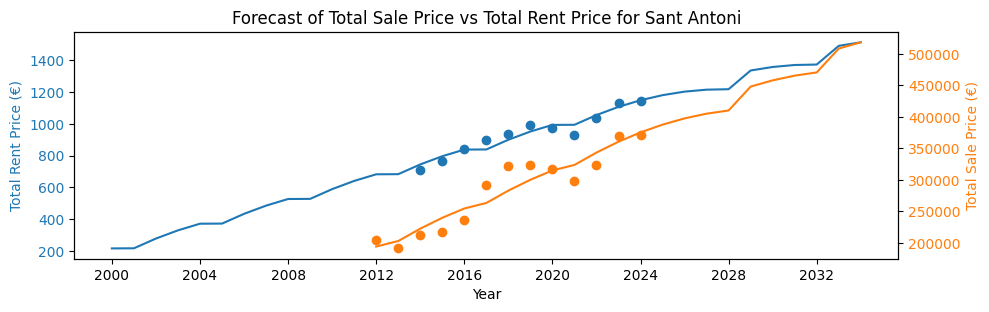

17:02:22 - cmdstanpy - INFO - Chain [1] start processing
17:02:22 - cmdstanpy - INFO - Chain [1] done processing


ValueError: Dataframe has less than 2 non-NaN rows.

In [ ]:
# Get unique barris
barris = lloguer_df[lloguer_df['Tipus de territori'] == 'Barri']['Territori'].unique()

# Loop through each barri and plot forecasts
for barri in barris:
    # Filter data for the current barri
    barri_rent_df = lloguer_df[(lloguer_df['Tipus de territori'] == 'Barri') & (lloguer_df['Territori'] == barri)]
    barri_sale_df = compraventa_df[(compraventa_df['Tipus de territori'] == 'Barri') & (compraventa_df['Territori'] == barri)]
    
    # Prepare data for Prophet
    barri_rent_data = prepare_data(barri_rent_df, 'total_rent_price')
    barri_sale_data = prepare_data(barri_sale_df, 'total_sale_price')
    
    # Train and predict using Prophet
    model_rent, forecast_rent = train_and_predict(barri_rent_data, periods=10)
    model_sale, forecast_sale = train_and_predict(barri_sale_data, periods=10)
    
    # Plot the forecasts with dual y-axes
    plot_forecast_dual_y(model_rent, forecast_rent, barri_rent_data, model_sale, forecast_sale, barri_sale_data, f'Forecast of Total Sale Price vs Total Rent Price for {barri}')



16:34:57 - cmdstanpy - INFO - Chain [1] start processing
16:34:57 - cmdstanpy - INFO - Chain [1] done processing
16:34:57 - cmdstanpy - INFO - Chain [1] start processing
16:34:58 - cmdstanpy - INFO - Chain [1] done processing
16:34:58 - cmdstanpy - INFO - Chain [1] start processing
16:34:58 - cmdstanpy - INFO - Chain [1] done processing
16:34:58 - cmdstanpy - INFO - Chain [1] start processing
16:34:58 - cmdstanpy - INFO - Chain [1] done processing


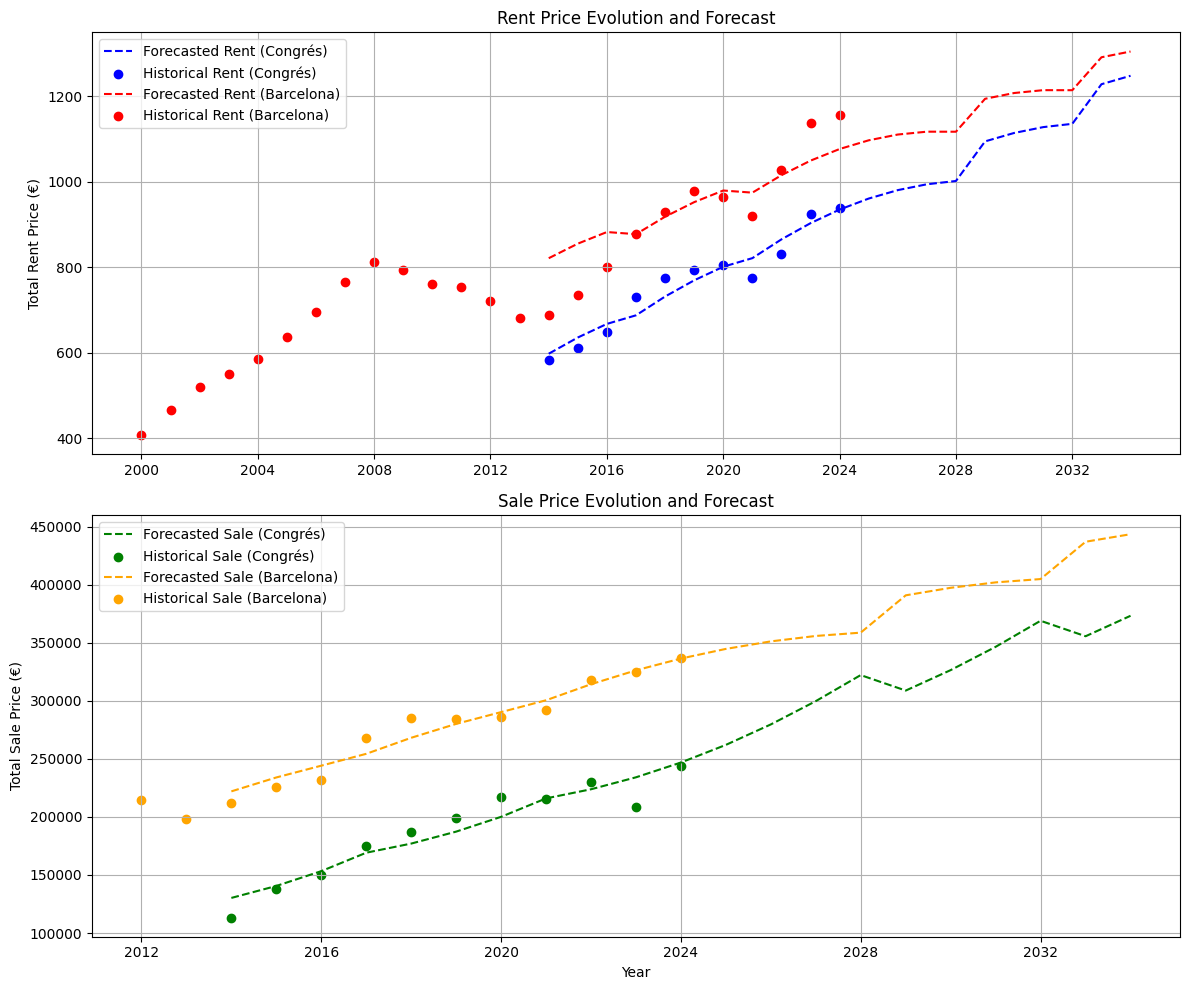

In [ ]:
# Filter data for both areas
congres_rent_df = lloguer_df[(lloguer_df['Tipus de territori'] == 'Barri') & 
                            (lloguer_df['Territori'] == 'el Congres i els Indians') & 
                            (lloguer_df['year'] >= 2014)]
congres_sale_df = compraventa_df[(compraventa_df['Tipus de territori'] == 'Barri') & 
                                (compraventa_df['Territori'] == 'el Congres i els Indians') & 
                                (compraventa_df['year'] >= 2014)]

barcelona_rent_df = lloguer_df[(lloguer_df['Tipus de territori'] == 'Municipi') & 
                              (lloguer_df['Territori'] == 'Barcelona') ]
barcelona_sale_df = compraventa_df[(compraventa_df['Tipus de territori'] == 'Municipi') & 
                                  (compraventa_df['Territori'] == 'Barcelona')]

# Prepare data for Prophet
congres_rent_data = prepare_data(congres_rent_df, 'total_rent_price')
congres_sale_data = prepare_data(congres_sale_df, 'total_sale_price')
barcelona_rent_data = prepare_data(barcelona_rent_df, 'total_rent_price')
barcelona_sale_data = prepare_data(barcelona_sale_df, 'total_sale_price')

# Train Prophet models
model_rent_congres = Prophet()
model_rent_congres.fit(congres_rent_data)

model_sale_congres = Prophet()
model_sale_congres.fit(congres_sale_data)

model_rent_bcn = Prophet()
model_rent_bcn.fit(barcelona_rent_data)

model_sale_bcn = Prophet()
model_sale_bcn.fit(barcelona_sale_data)

# Create future dataframe
future = model_rent_congres.make_future_dataframe(periods=10, freq='YE')

# Make predictions
forecast_rent_congres = model_rent_congres.predict(future)
forecast_sale_congres = model_sale_congres.predict(future)
forecast_rent_bcn = model_rent_bcn.predict(future)
forecast_sale_bcn = model_sale_bcn.predict(future)

# Plot forecasts
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Rent prices plot
ax1.plot(forecast_rent_congres['ds'], forecast_rent_congres['yhat'], 
         label='Forecasted Rent (Congrés)', color='blue', linestyle='--')
ax1.scatter(congres_rent_data['ds'], congres_rent_data['y'], 
           color='blue', marker='o', label='Historical Rent (Congrés)')
ax1.plot(forecast_rent_bcn['ds'], forecast_rent_bcn['yhat'], 
         label='Forecasted Rent (Barcelona)', color='red', linestyle='--')
ax1.scatter(barcelona_rent_data['ds'], barcelona_rent_data['y'], 
           color='red', marker='o', label='Historical Rent (Barcelona)')
ax1.set_ylabel('Total Rent Price (€)')
ax1.set_title('Rent Price Evolution and Forecast')
ax1.legend()
ax1.grid(True)

# Sale prices plot
ax2.plot(forecast_sale_congres['ds'], forecast_sale_congres['yhat'], 
         label='Forecasted Sale (Congrés)', color='green', linestyle='--')
ax2.scatter(congres_sale_data['ds'], congres_sale_data['y'], 
           color='green', marker='o', label='Historical Sale (Congrés)')
ax2.plot(forecast_sale_bcn['ds'], forecast_sale_bcn['yhat'], 
         label='Forecasted Sale (Barcelona)', color='orange', linestyle='--')
ax2.scatter(barcelona_sale_data['ds'], barcelona_sale_data['y'], 
           color='orange', marker='o', label='Historical Sale (Barcelona)')
ax2.set_ylabel('Total Sale Price (€)')
ax2.set_xlabel('Year')
ax2.set_title('Sale Price Evolution and Forecast')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()